<h1><center> REINFORCEMENT LEARNING </center></h1>
<h2><center> POLICY GRADIENT ALGORITHMS </center></h2>

## 1. SOURCES

https://github.com/firmai/financial-machine-learning

https://colab.research.google.com/drive/1FzLCI0AO3c7A4bp9Fi01UwXeoc7BN8sW

https://pathmind.com/wiki/deep-reinforcement-learning

https://youtu.be/-uXVu0l8guo

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

## 2. CREATING THE DATA FILE

In [4]:
## Further  recommendation, test multiple frameworks, see what works better on average. 
## Open source RL: https://docs.google.com/spreadsheets/d/1EeFPd-XIQ3mq_9snTlAZSsFY7Hbnmd7P5bbT8LPuMn0/edit#gid=0

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [5]:

from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
df_full = pdr.get_data_yahoo("JPM", start="2000-01-01").reset_index()
df_full.to_csv('JPM.csv',index=False)
df_full.head()


D:\Program Files\Anaconda\lib\site-packages\fix_yahoo_finance\__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



,Date,High,Low,Open,Close,Volume,Adj Close
0,2000-01-03,50.250000,48.083332,49.833332,48.583332,12019200.0,26.681709
1,2000-01-04,47.458332,46.125000,47.083332,47.250000,11723400.0,26.170267
2,2000-01-05,48.375000,46.000000,46.833332,46.958332,8714500.0,26.008717
3,2000-01-06,48.625000,46.500000,46.750000,47.625000,8369200.0,26.377962
4,2000-01-07,49.000000,47.333332,48.416668,48.500000,6571900.0,26.862602


In [6]:
df_full = pd.read_csv('JPM.csv')

## 3. REINFORCEMENT LEARNING

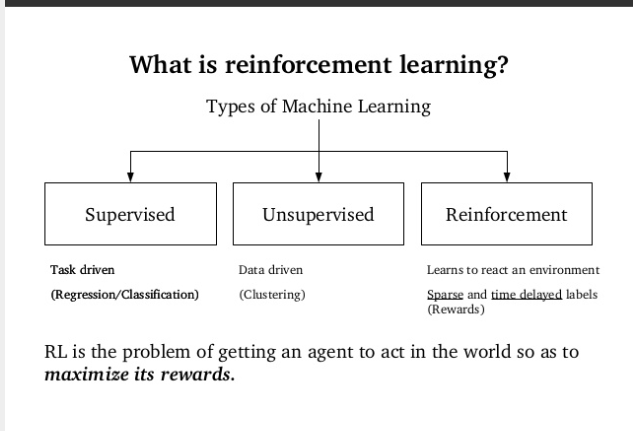


### 3.1. GENERAL CONCEPTS


Reinforcement learning (RL) is an area of machine learning concerned with how software agents ought to take actions in an environment **in order to maximize some notion of cumulative reward.** 


**`Reinforcement learning is one of three basic machine learning paradigms, alongside supervised learning and unsupervised learning`**.

> - Reinforcement learning differs from supervised learning in not needing labelled input/output pairs be presented, 
> - Not needing sub-optimal actions to be explicitly corrected. 
> - The focus is on finding a balance between exploration (of uncharted territory) and exploitation (of current knowledge).

The environment is typically stated in the form of a Markov decision process (MDP), because many reinforcement learning algorithms for this context utilize dynamic programming techniques.

The main difference between the classical dynamic programming methods and reinforcement learning algorithms is that the latter do not assume knowledge of an exact mathematical model of the MDP and they target large MDPs where exact methods become infeasible.

Reinforcement learning, due to its generality, is studied in many other disciplines, such as game theory, control theory, operations research, information theory, simulation-based optimization, multi-agent systems, swarm intelligence, statistics and genetic algorithms. 

**In the operations research and control literature, reinforcement learning is called approximate dynamic programming**, or neuro-dynamic programming. The problems of interest in reinforcement learning have also been studied in the theory of optimal control, which is concerned mostly with the existence and characterization of optimal solutions, and algorithms for their exact computation, and less with learning or approximation, particularly in the absence of a mathematical model of the environment. In economics and game theory, reinforcement learning may be used to explain how equilibrium may arise under bounded rationality.

A reinforcement learning agent interacts with its environment in discrete time steps. At each time t, the agent receives an observation $o_{t}$, which typically includes the reward $r_{t}$. It then chooses an action $a_{t}$ from the set of available actions, which is subsequently sent to the environment. The environment moves to a new state $s_{t+1}$ and the reward $r_{t+1}$ associated with the transition $(s_{t},a_{t},s_{t+1})$ is determined. The goal of a reinforcement learning agent is to collect as much reward as possible. The agent can (possibly randomly) choose any action as a function of the history.

When the agent's performance is compared to that of an agent that acts optimally, the difference in performance gives rise to the notion of regret. In order to act near optimally, the agent must reason about the long term consequences of its actions (i.e., maximize future income), although the immediate reward associated with this might be negative.

Thus, reinforcement learning is particularly well-suited to problems that include a long-term versus short-term reward trade-off. It has been applied successfully to various problems, including robot control, elevator scheduling, telecommunications, backgammon, checkers and Go (AlphaGo).

Two elements make reinforcement learning powerful: the use of samples to optimize performance and the use of function approximation to deal with large environments. Thanks to these two key components, reinforcement learning can be used in large environments in the following situations:

Reinforcement learning can be understood using the concepts of agents, environments, states, actions and rewards, all of which we’ll explain below. Capital letters tend to denote sets of things, and lower-case letters denote a specific instance of that thing; e.g. A is all possible actions, while a is a specific action contained in the set.

Agent: An agent takes actions; for example, a drone making a delivery, or Super Mario navigating a video game. The algorithm is the agent. It may be helpful to consider that in life, the agent is you.1


**Action (A):**

A is the set of all possible moves the agent can make. An action is almost self-explanatory, but it should be noted that agents usually choose from a list of discrete, possible actions. In video games, the list might include running right or left, jumping high or low, crouching or standing still. In the stock markets, the list might include buying, selling or holding any one of an array of securities and their derivatives. When handling aerial drones, alternatives would include many different velocities and accelerations in 3D space.


**Discount factor:** 

The discount factor is multiplied by future rewards as discovered by the agent in order to dampen thse rewards’ effect on the agent’s choice of action. Why? It is designed to make future rewards worth less than immediate rewards; i.e. it enforces a kind of short-term hedonism in the agent. Often expressed with the lower-case Greek letter gamma: γ. If γ is .8, and there’s a reward of 10 points after 3 time steps, the present value of that reward is 0.8³ x 10. A discount factor of 1 would make future rewards worth just as much as immediate rewards. We’re fighting against delayed gratification here.


**Environment:**

The world through which the agent moves, and which responds to the agent. The environment takes the agent’s current state and action as input, and returns as output the agent’s reward and its next state. If you are the agent, the environment could be the laws of physics and the rules of society that process your actions and determine the consequences of them.


**State (S):**

A state is a concrete and immediate situation in which the agent finds itself; i.e. a specific place and moment, an instantaneous configuration that puts the agent in relation to other significant things such as tools, obstacles, enemies or prizes. It can the current situation returned by the environment, or any future situation. Were you ever in the wrong place at the wrong time? That’s a state.


**Reward (R):**

A reward is the feedback by which we measure the success or failure of an agent’s actions in a given state. For example, in a video game, when Mario touches a coin, he wins points. From any given state, an agent sends output in the form of actions to the environment, and the environment returns the agent’s new state (which resulted from acting on the previous state) as well as rewards, if there are any. Rewards can be immediate or delayed. They effectively evaluate the agent’s action.
Policy (π): The policy is the strategy that the agent employs to determine the next action based on the current state. It maps states to actions, the actions that promise the highest reward.


**Value (V):** 

The expected long-term return with discount, as opposed to the short-term reward R. Vπ(s) is defined as the expected long-term return of the current state under policy π. We discount rewards, or lower their estimated value, the further into the future they occur. See discount factor. And remember Keynes: “In the long run, we are all dead.” That’s why you discount future rewards. It is useful to distinguish


**Q-value or action-value (Q):**

Q-value is similar to Value, except that it takes an extra parameter, the current action a. Qπ(s, a) refers to the long-term return of an action taking action a under policy π from the current state s. Q maps state-action pairs to rewards. Note the difference between Q and policy.


**Trajectory:** 

A sequence of states and actions that influence those states. From the Latin “to throw across.” The life of an agent is but a ball tossed high and arching through space-time unmoored, much like humans in the modern world.


**Key distinctions:**

Reward is an immediate signal that is received in a given state, while value is the sum of all rewards you might anticipate from that state. Value is a long-term expectation, while reward is an immediate pleasure. Value is eating spinach salad for dinner in anticipation of a long and healthy life; reward is eating cocaine for dinner and to hell with it. They differ in their time horizons. So you can have states where value and reward diverge: you might receive a low, immediate reward (spinach) even as you move to position with great potential for long-term value; or you might receive a high immediate reward (cocaine) that leads to diminishing prospects over time. This is why the value function, rather than immediate rewards, is what reinforcement learning seeks to predict and control.

Reinforcement learning judges actions by the results they produce. It is goal oriented, and its aim is to learn sequences of actions that will lead an agent to achieve its goal, or maximize its objective function. Here are some examples:

In video games, the goal is to finish the game with the most points, so each additional point obtained throughout the game will affect the agent’s subsequent behavior; i.e. the agent may learn that it should shoot battleships, touch coins or dodge meteors to maximize its score.
In the real world, the goal might be for a robot to travel from point A to point B, and every inch the robot is able to move closer to point B could be counted like points.
Here’s an example of an objective function for reinforcement learning; i.e. the way it defines its goal.

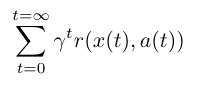

Reinforcement learning differs from both supervised and unsupervised learning by how it interprets inputs. We can illustrate their difference by describing what they learn about a “thing.”

**Unsupervised learning: **

That thing is like this other thing. (The algorithms learn similarities w/o names, and by extension they can spot the inverse and perform anomaly detection by recognizing what is unusual or dissimilar)


**Supervised learning:** 

That thing is a “double bacon cheese burger”. (Labels, putting names to faces…) These algorithms learn the correlations between data instances and their labels; that is, they require a labelled dataset. Those labels are used to “supervise” and correct the algorithm as it makes wrong guesses when predicting labels.


**Reinforcement learning:** 

Eat that thing because it tastes good and will keep you alive longer. (Actions based on short- and long-term rewards, such as the amount of calories you ingest, or the length of time you survive.) Reinforcement learning can be thought of as supervised learning in an environment of sparse feedback.

**Reinforcement learning is the process of running the agent through sequences of state-action pairs, observing the rewards that result, and adapting the predictions of the Q function to those rewards until it accurately predicts the best path for the agent to take. That prediction is known as a policy**

Reinforcement learning is an **attempt to model a complex probability distribution of rewards** in relation to a very large number of state-action pairs. This is one reason reinforcement learning is paired with, say, a Markov decision process, a method to sample from a complex distribution to infer its properties. It closely resembles the problem that inspired Stan Ulam to invent the Monte Carlo method; namely, trying to infer the chances that a given hand of solitaire will turn out successful.

Reinforcement learning is iterative. In its most interesting applications, it doesn’t begin by knowing which rewards state-action pairs will produce. It learns those relations by running through states again and again, like athletes or musicians iterate through states in an attempt to improve their performance.

### 3.2. NEURAL NETWORKS IN REINFORCEMENT LEARNING

Neural networks are function approximators, which are particularly useful in reinforcement learning when the state space or action space are too large to be completely known.

A neural network can be used to approximate a value function, or a policy function. That is, neural nets can learn to map states to values, or state-action pairs to Q values. Rather than use a lookup table to store, index and update all possible states and their values, which impossible with very large problems, we can train a neural network on samples from the state or action space to learn to predict how valuable those are relative to our target in reinforcement learning.

Like all neural networks, they use coefficients to approximate the function relating inputs to outputs, and their learning consists to finding the right coefficients, or weights, by iteratively adjusting those weights along gradients that promise less error.

In reinforcement learning, convolutional networks can be used to recognize an agent’s state when the input is visual; e.g. the screen that Mario is on, or the terrain before a drone. That is, they perform their typical task of image recognition.

But convolutional networks derive different interpretations from images in reinforcement learning than in supervised learning. In supervised learning, the network applies a label to an image; that is, it matches names to pixels.

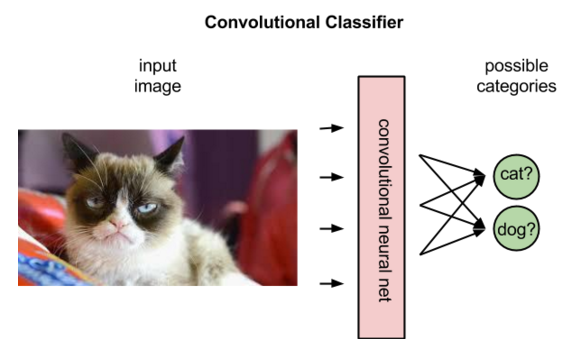

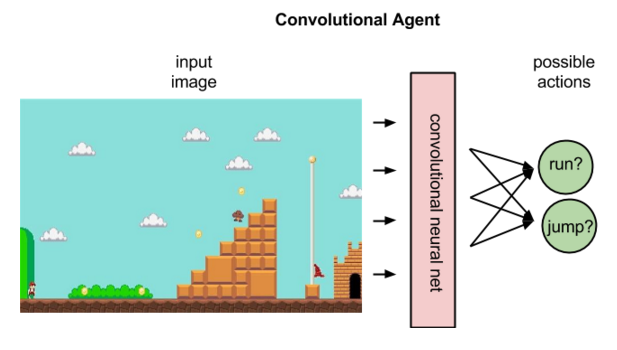

At the beginning of reinforcement learning, the neural network coefficients may be initialized stochastically, or randomly. Using feedback from the environment, the neural net can use the difference between its expected reward and the ground-truth reward to adjust its weights and improve its interpretation of state-action pairs.

This feedback loop is analogous to the backpropagation of error in supervised learning. However, supervised learning begins with knowledge of the ground-truth labels the neural network is trying to predict. Its goal is to create a model that maps different images to their respective names.

Reinforcement learning relies on the environment to send it a scalar number in response to each new action. The rewards returned by the environment can be varied, delayed or affected by unknown variables, introducing noise to the feedback loop.

This leads us to a more complete expression of the Q function, which takes into account not only the immediate rewards produced by an action, but also the delayed rewards that may be returned several time steps deeper in the sequence.

https://youtu.be/EHP47tM6ctc

## 4. POLICY GRADIENT REINFORCEMENT ALGORITHM

In order to sopporting this section we go to: **Kapoor,S. (2018) `Policy Gradients in a Nuthshell`**   located at https://towardsdatascience.com/policy-gradients-in-a-nutshell-8b72f9743c5d 

Reinforcement Learning (RL) refers to both the learning problem and the sub-field of machine learning which has lately been in the news for great reasons. RL based systems have now beaten world champions of Go, helped operate datacenters better and mastered a wide variety of Atari games. The research community is seeing many more promising results. With enough motivation, let us now take a look at the Reinforcement Learning problem.
Reinforcement Learning is the most general description of the learning problem where the aim is to maximize a long-term objective. The system description consists of an agent which interacts with the environment via its actions at discrete time steps and receives a reward. This transitions the agent into a new state. A canonical agent-environment feedback loop is depicted by the figure below.

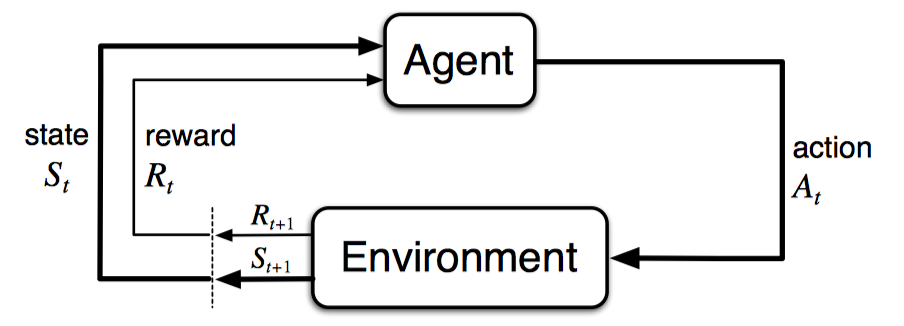

A large amount of theory behind RL lies under the assumption of The Reward Hypothesis which in summary states that all goals and purposes of an agent can be explained by a single scalar called the reward. This is still subject to debate but has been fairly hard to disprove yet. More formally, the reward hypothesis is given below
The Reward Hypothesis: That all of what we mean by goals and purposes can be well thought of as the maximization of the expected value of the cumulative sum of a received scalar signal (called reward).
As an RL practitioner and researcher, one’s job is to find the right set of rewards for a given problem known as reward shaping.
The agent must formally work through a theoretical framework known as a Markov Decision Process which consists of a decision (what action to take?) to be made at each state. This gives rise to a sequence of states, actions and rewards known as a trajectory,


Markov Decision Process: A (Discounted) Markov Decision Process (MDP) is a tuple (S,A,R,p,γ), such that

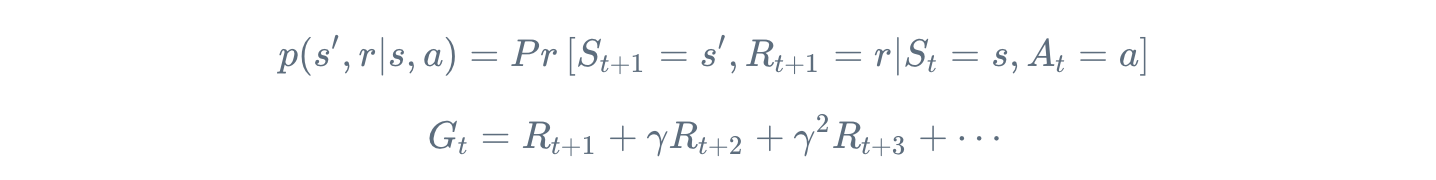

where S_t​, S_(t+1) ​∈ S (state space), A_(t+1) ​∈ A (action space), R_(t+1)​, R_t ​∈ R (reward space), p defines the dynamics of the process and G_t​ is the discounted return.

## 5. POLICY GRADIENT

The objective of a Reinforcement Learning agent is to maximize the “expected” reward when following a policy π. Like any Machine Learning setup, we define a set of parameters θ (e.g. the coefficients of a complex polynomial or the weights and biases of units in a neural network) to parametrize this policy — π_θ​ (also written a π for brevity). If we represent the total reward for a given trajectory τ as r(τ), we arrive at the following definition.

Reinforcement Learning Objective: Maximize the “expected” reward following a parametrized policy

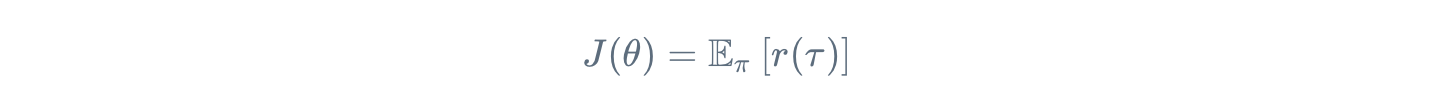

All finite MDPs have at least one optimal policy (which can give the maximum reward) and among all the optimal policies at least one is stationary and deterministic.
Like any other Machine Learning problem, if we can find the parameters θ⋆ which maximize J, we will have solved the task. A standard approach to solving this maximization problem in Machine Learning Literature is to use Gradient Ascent (or Descent). In gradient ascent, we keep stepping through the parameters using the following update rule

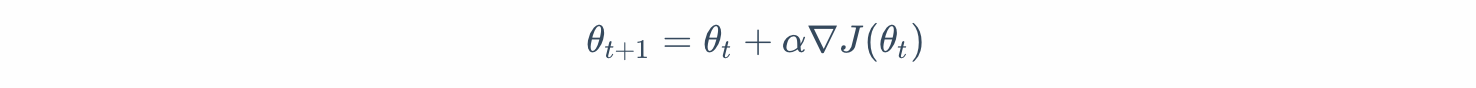

Here comes the challenge, how do we find the gradient of the objective above which contains the expectation. Integrals are always bad in a computational setting. We need to find a way around them. First step is to reformulate the gradient starting with the expansion of expectation (with a slight abuse of notation).

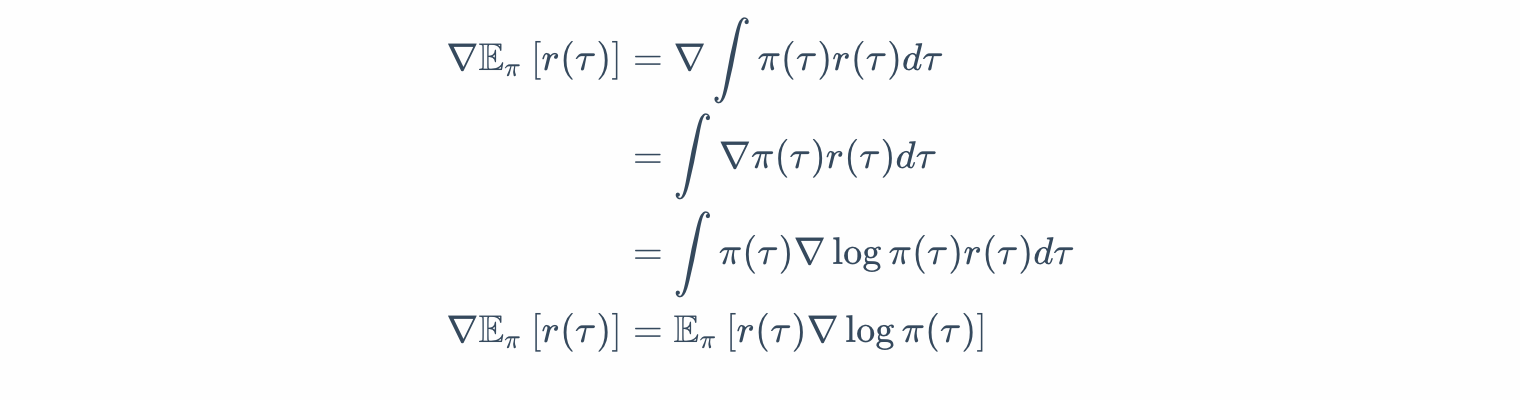

The Policy Gradient Theorem: The derivative of the expected reward is the expectation of the product of the reward and gradient of the log of the policy π_θ​.

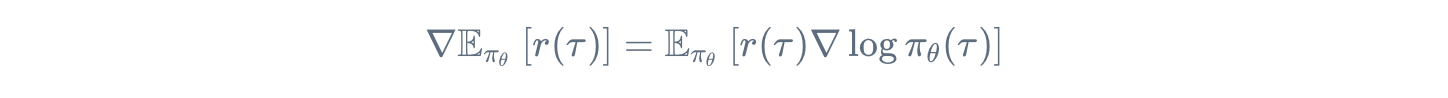

Now, let us expand the definition of π_θ​(τ).

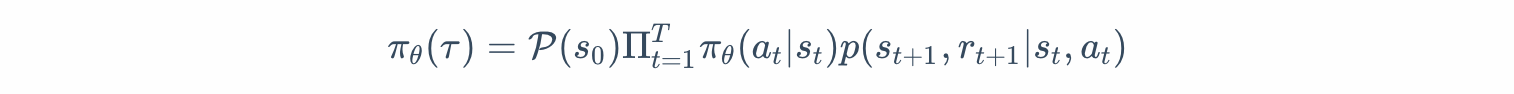

To understand this computation, let us break it down — P represents the ergodic distribution of starting in some state s_0​. From then onwards, we apply the product rule of probability because each new action probability is independent of the previous one (remember Markov?). At each step, we take some action using the policy π_θ​ and the environment dynamics p decide which new state to transition into. Those are multiplied over T time steps representing the length of the trajectory. Equivalently, taking the log, we have

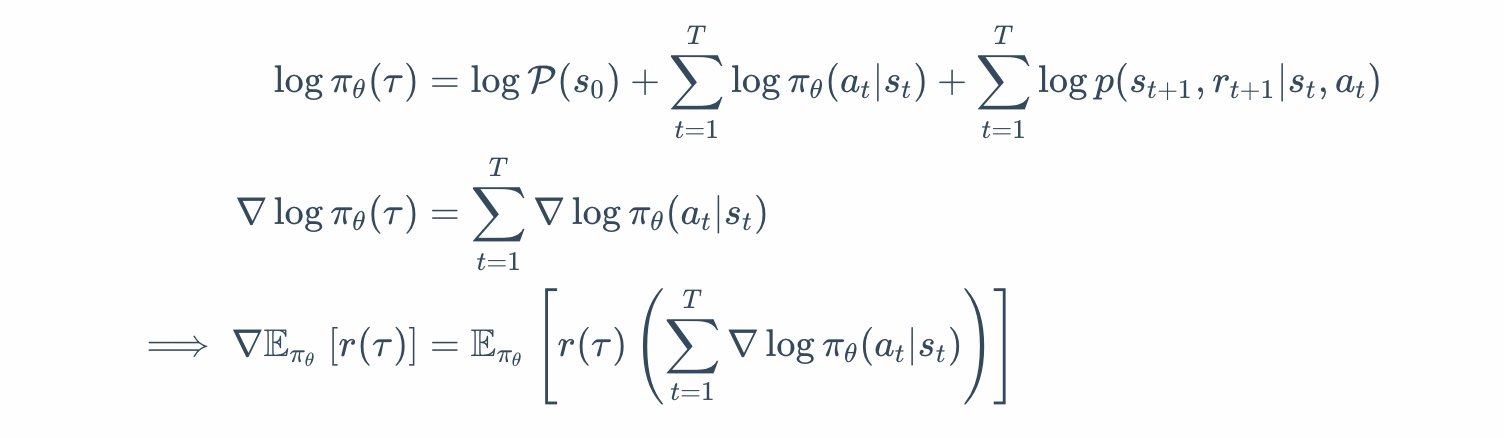

This result is beautiful in its own right because this tells us, that we don’t really need to know about the ergodic distribution of states P nor the environment dynamics p. This is crucial because for most practical purposes, it hard to model both these variables. Getting rid of them, is certainly good progress. As a result, all algorithms that use this result are known as “Model-Free Algorithms” because we don’t “model” the environment.

**The “expectation” (or equivalently an integral term) still lingers around. A simple but effective approach is to sample a large number of trajectories (I really mean LARGE!) and average them out. This is an approximation but an unbiased one, similar to approximating an integral over continuous space with a discrete set of points in the domain. This technique is formally known as Markov Chain Monte-Carlo (MCMC), widely used in Probabilistic Graphical Models and Bayesian Networks to approximate parametric probability distributions.**

One term that remains untouched in our treatment above is the reward of the trajectory r(τ). Even though the gradient of the parametrized policy does not depend on the reward, this term adds a lot of variance in the MCMC sampling. Effectively, there are T sources of variance with each R_t​ contributing. However, we can instead make use of the returns G_t​ because from the standpoint of optimizing the RL objective, rewards of the past don’t contribute anything. Hence, if we replace r(τ) by the discounted return G_t​, we arrive at the classic algorithm Policy Gradient algorithm called REINFORCE. This doesn’t totally alleviate the problem as we discuss further.

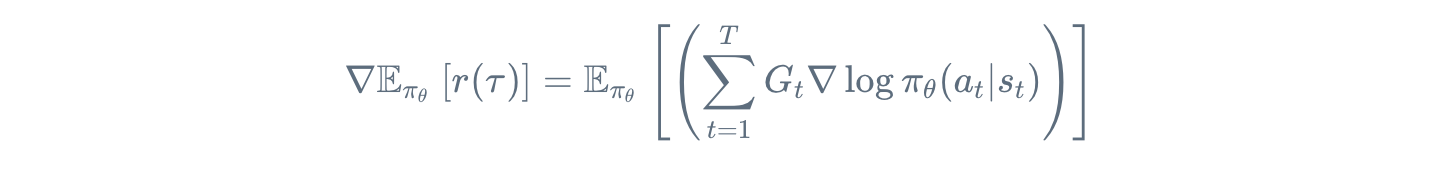


We still have not solved the problem of variance in the sampled trajectories. One way to realize the problem is to reimagine the RL objective defined above as Likelihood Maximization (Maximum Likelihood Estimate). In an MLE setting, it is well known that data overwhelms the prior — in simpler words, no matter how bad initial estimates are, in the limit of data, the model will converge to the true parameters. However, in a setting where the data samples are of high variance, stabilizing the model parameters can be notoriously hard. In our context, any erratic trajectory can cause a sub-optimal shift in the policy distribution. This problem is aggravated by the scale of rewards.

## 6. A POLICY GRADIENT AGENT

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import tensorflow as tf

#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
df = df_full.copy()
name = 'Policy Gradient agent'
class Agent:

    LEARNING_RATE = 1e-4
    LAYER_SIZE = 256
    GAMMA = 0.9
    OUTPUT_SIZE = 3

    def __init__(self, state_size, window_size, trend, skip):
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        self.X = tf.placeholder(tf.float32, (None, self.state_size))
        self.REWARDS = tf.placeholder(tf.float32, (None))
        self.ACTIONS = tf.placeholder(tf.int32, (None))
        feed_forward = tf.layers.dense(self.X, self.LAYER_SIZE, activation = tf.nn.relu)
        self.logits = tf.layers.dense(feed_forward, self.OUTPUT_SIZE, activation = tf.nn.softmax)
        input_y = tf.one_hot(self.ACTIONS, self.OUTPUT_SIZE)
        loglike = tf.log((input_y * (input_y - self.logits) + (1 - input_y) * (input_y + self.logits)) + 1)
        rewards = tf.tile(tf.reshape(self.REWARDS, (-1,1)), [1, self.OUTPUT_SIZE])
        self.cost = -tf.reduce_mean(loglike * (rewards + 1)) 
        self.optimizer = tf.train.AdamOptimizer(learning_rate = self.LEARNING_RATE).minimize(self.cost)
        self.sess = tf.InteractiveSession()
        self.sess.run(tf.global_variables_initializer())
    
    def predict(self, inputs):
        return self.sess.run(self.logits, feed_dict={self.X:inputs})
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array([res])
    
    def discount_rewards(self, r):
        discounted_r = np.zeros_like(r)
        running_add = 0
        for t in reversed(range(0, r.size)):
            running_add = running_add * self.GAMMA + r[t]
            discounted_r[t] = running_add
        return discounted_r
    
    def get_predicted_action(self, sequence):
        prediction = self.predict(np.array(sequence))[0]
        return np.argmax(prediction)
    
    def buy(self, initial_money):
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        state = self.get_state(0)
        for t in range(0, len(self.trend) - 1, self.skip):
            action = self.get_predicted_action(state)
            next_state = self.get_state(t + 1)
            
            if action == 1 and initial_money >= self.trend[t] and t < (len(self.trend) - self.half_window):
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
                
                
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            
            state = next_state
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
        
    
    def train(self, iterations, checkpoint, initial_money):
        for i in range(iterations):
            ep_history = []
            total_profit = 0
            inventory = []
            state = self.get_state(0)
            starting_money = initial_money
            for t in range(0, len(self.trend) - 1, self.skip):
                action = self.get_predicted_action(state)
                next_state = self.get_state(t + 1)
                if action == 1 and starting_money >= self.trend[t] and t < (len(self.trend) - self.half_window):
                    inventory.append(self.trend[t])
                    starting_money -= close[t]
                
                elif action == 2 and len(inventory):
                    bought_price = inventory.pop(0)
                    total_profit += self.trend[t] - bought_price
                    starting_money += self.trend[t]
                ep_history.append([state,action,starting_money,next_state])
                state = next_state
            ep_history = np.array(ep_history)
            ep_history[:,2] = self.discount_rewards(ep_history[:,2])
            cost, _ = self.sess.run([self.cost, self.optimizer], feed_dict={self.X:np.vstack(ep_history[:,0]),
                                                    self.REWARDS:ep_history[:,2],
                                                    self.ACTIONS:ep_history[:,1]})
            if (i+1) % checkpoint == 0:
                print('epoch: %d, total rewards: %f.3, cost: %f, total money: %f'%(i + 1, total_profit, cost,
                                                                                  starting_money))

In [8]:
close = df.Close.values.tolist()
initial_money = 10000
window_size = 30
skip = 1
agent = Agent(state_size = window_size,
             window_size = window_size,
             trend = close,
             skip = skip)
agent.train(iterations = 200, checkpoint = 10, initial_money = initial_money)

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
epoch: 10, total rewards: 150.802118.3, cost: -31873.556641, total money: 10150.802118
epoch: 20, total rewards: 280.854565.3, cost: -32531.085938, total money: 10280.854565
epoch: 30, total rewards: 946.999685.3, cost: -33733.550781, total money: 10946.999685
epoch: 40, total rewards: 2827.808460.3, cost: -31076.566406, total money: 12827.808460
epoch: 50, total rewards: 8302.199217.3, cost: -25262.167969, total money: 12582.419233
epoch: 60, total rewards: 9347.168443.3, cost: -21917.851562, total money: 9845.818429
epoch: 70, total rewards: 7120.589284.3, cost: -23848.275391, total money: 11398.249318
epoch: 80, total rewards: 7180.128460.3, cost: -23983.230469, total money: 9969.898479
epoch: 90, total rewards: 6995.703463.3, cost: -24454.521484, total money: 10153.443483
epoch: 100, total rewards: 6849.832624.3, cost: -23013.941406, total money: 8574.93

In [10]:
states_buy, states_sell, total_gains, invest = agent.buy(initial_money = initial_money)

day 0: buy 1 unit at price 48.583332, total balance 9951.416668
day 1: buy 1 unit at price 47.250000, total balance 9904.166668
day 2: buy 1 unit at price 46.958332, total balance 9857.208336
day 4, sell 1 unit at price 48.500000, investment -0.171524 %, total balance 9905.708336,
day 5: buy 1 unit at price 47.666668, total balance 9858.041668
day 6, sell 1 unit at price 46.541668, investment -1.499115 %, total balance 9904.583336,
day 7: buy 1 unit at price 46.833332, total balance 9857.750004
day 9: buy 1 unit at price 49.250000, total balance 9808.500004
day 10: buy 1 unit at price 47.333332, total balance 9761.166672
day 12: buy 1 unit at price 49.375000, total balance 9711.791672
day 13, sell 1 unit at price 48.625000, investment 3.549249 %, total balance 9760.416672,
day 14: buy 1 unit at price 48.666668, total balance 9711.750004
day 15: buy 1 unit at price 49.750000, total balance 9662.000004
day 16: buy 1 unit at price 52.291668, total balance 9609.708336
day 17: buy 1 unit at

day 389: buy 1 unit at price 43.700001, total balance 9220.025021
day 391: buy 1 unit at price 43.009998, total balance 9177.015022
day 393, sell 1 unit at price 42.900002, investment -10.921923 %, total balance 9219.915024,
day 394, sell 1 unit at price 43.240002, investment -12.522757 %, total balance 9263.155025,
day 396: buy 1 unit at price 43.810001, total balance 9219.345024
day 397: buy 1 unit at price 43.299999, total balance 9176.045025
day 398, sell 1 unit at price 43.500000, investment -13.034787 %, total balance 9219.545025,
day 405: buy 1 unit at price 42.250000, total balance 9177.295025
day 407: buy 1 unit at price 42.250000, total balance 9135.045025
day 408: buy 1 unit at price 42.150002, total balance 9092.895023
day 409: buy 1 unit at price 42.180000, total balance 9050.715023
day 410: buy 1 unit at price 41.480000, total balance 9009.235023
day 411: buy 1 unit at price 41.090000, total balance 8968.145023
day 412, sell 1 unit at price 40.410000, investment -18.08230

day 945: buy 1 unit at price 35.610001, total balance 8631.275000
day 948: buy 1 unit at price 36.439999, total balance 8594.835001
day 949, sell 1 unit at price 36.779999, investment 36.881271 %, total balance 8631.615000,
day 951: buy 1 unit at price 36.840000, total balance 8594.775000
day 953, sell 1 unit at price 36.599998, investment 34.016841 %, total balance 8631.374998,
day 954: buy 1 unit at price 36.669998, total balance 8594.705000
day 955: buy 1 unit at price 34.980000, total balance 8559.725000
day 956, sell 1 unit at price 35.000000, investment 21.485598 %, total balance 8594.725000,
day 957: buy 1 unit at price 34.770000, total balance 8559.955000
day 958: buy 1 unit at price 34.950001, total balance 8525.004999
day 959: buy 1 unit at price 35.549999, total balance 8489.455000
day 961, sell 1 unit at price 35.840000, investment 22.112435 %, total balance 8525.295000,
day 963: buy 1 unit at price 36.709999, total balance 8488.585001
day 966: buy 1 unit at price 36.310001

day 1454: buy 1 unit at price 34.080002, total balance 6963.825029
day 1456, sell 1 unit at price 33.770000, investment -10.590416 %, total balance 6997.595030,
day 1457: buy 1 unit at price 34.730000, total balance 6962.865030
day 1458: buy 1 unit at price 34.750000, total balance 6928.115030
day 1460: buy 1 unit at price 35.759998, total balance 6892.355032
day 1462: buy 1 unit at price 36.099998, total balance 6856.255033
day 1463: buy 1 unit at price 36.029999, total balance 6820.225035
day 1464: buy 1 unit at price 36.439999, total balance 6783.785036
day 1466, sell 1 unit at price 36.849998, investment -2.539018 %, total balance 6820.635035,
day 1467, sell 1 unit at price 37.200001, investment -3.125002 %, total balance 6857.835035,
day 1469: buy 1 unit at price 37.310001, total balance 6820.525034
day 1470: buy 1 unit at price 37.680000, total balance 6782.845034
day 1471, sell 1 unit at price 37.340000, investment -1.321353 %, total balance 6820.185034,
day 1473: buy 1 unit at 

day 1943, sell 1 unit at price 46.130001, investment 4.083938 %, total balance 5143.535044,
day 1945: buy 1 unit at price 45.820000, total balance 5097.715044
day 1952: buy 1 unit at price 47.570000, total balance 5050.145044
day 1954, sell 1 unit at price 46.660000, investment 9.171731 %, total balance 5096.805044,
day 1955, sell 1 unit at price 46.820000, investment 11.026800 %, total balance 5143.625044,
day 1956: buy 1 unit at price 46.270000, total balance 5097.355043
day 1957: buy 1 unit at price 45.110001, total balance 5052.245043
day 1961, sell 1 unit at price 45.369999, investment 6.903865 %, total balance 5097.615042,
day 1962, sell 1 unit at price 45.939999, investment 7.739210 %, total balance 5143.555040,
day 1963, sell 1 unit at price 46.270000, investment 6.172553 %, total balance 5189.825041,
day 1967: buy 1 unit at price 46.560001, total balance 5143.265039
day 1968, sell 1 unit at price 47.000000, investment 9.378633 %, total balance 5190.265039,
day 1969: buy 1 unit

day 2406, sell 1 unit at price 37.770000, investment -7.562408 %, total balance 5158.775036,
day 2408, sell 1 unit at price 38.650002, investment -3.471527 %, total balance 5197.425037,
day 2409, sell 1 unit at price 39.599998, investment -11.921710 %, total balance 5237.025036,
day 2410: buy 1 unit at price 40.209999, total balance 5196.815037
day 2411, sell 1 unit at price 41.779999, investment -8.316877 %, total balance 5238.595036,
day 2414: buy 1 unit at price 42.689999, total balance 5195.905037
day 2415: buy 1 unit at price 41.240002, total balance 5154.665035
day 2417: buy 1 unit at price 42.900002, total balance 5111.765034
day 2418: buy 1 unit at price 42.450001, total balance 5069.315033
day 2422, sell 1 unit at price 42.419998, investment -3.194892 %, total balance 5111.735031,
day 2424: buy 1 unit at price 43.009998, total balance 5068.725033
day 2431, sell 1 unit at price 40.860001, investment -4.599582 %, total balance 5109.585033,
day 2432: buy 1 unit at price 42.110001

day 2903, sell 1 unit at price 40.389999, investment -6.396297 %, total balance 4963.725006,
day 2905: buy 1 unit at price 42.290001, total balance 4921.435005
day 2906: buy 1 unit at price 42.189999, total balance 4879.245007
day 2908: buy 1 unit at price 41.439999, total balance 4837.805008
day 2910, sell 1 unit at price 40.680000, investment -7.102079 %, total balance 4878.485008,
day 2911: buy 1 unit at price 40.450001, total balance 4838.035007
day 2912, sell 1 unit at price 40.439999, investment -7.544588 %, total balance 4878.475006,
day 2914, sell 1 unit at price 39.900002, investment -11.998232 %, total balance 4918.375008,
day 2915: buy 1 unit at price 37.919998, total balance 4880.455009
day 2917, sell 1 unit at price 34.060001, investment -25.568176 %, total balance 4914.515011,
day 2918, sell 1 unit at price 36.400002, investment -23.865299 %, total balance 4950.915012,
day 2919, sell 1 unit at price 34.369999, investment -24.544458 %, total balance 4985.285011,
day 2921, 

day 3388, sell 1 unit at price 50.919998, investment 17.354227 %, total balance 5857.885014,
day 3389: buy 1 unit at price 52.080002, total balance 5805.805012
day 3392, sell 1 unit at price 52.790001, investment 18.230681 %, total balance 5858.595013,
day 3393: buy 1 unit at price 52.490002, total balance 5806.105011
day 3397: buy 1 unit at price 54.700001, total balance 5751.405010
day 3399: buy 1 unit at price 54.830002, total balance 5696.575008
day 3403: buy 1 unit at price 55.009998, total balance 5641.565010
day 3405: buy 1 unit at price 56.369999, total balance 5585.195011
day 3406: buy 1 unit at price 56.160000, total balance 5529.035011
day 3407: buy 1 unit at price 56.560001, total balance 5472.475010
day 3408, sell 1 unit at price 56.669998, investment 25.487153 %, total balance 5529.145008,
day 3409: buy 1 unit at price 56.630001, total balance 5472.515007
day 3411, sell 1 unit at price 56.049999, investment 21.399180 %, total balance 5528.565006,
day 3413: buy 1 unit at p

day 3878, sell 1 unit at price 66.330002, investment 14.047459 %, total balance 5462.775009,
day 3879, sell 1 unit at price 67.419998, investment 17.089260 %, total balance 5530.195007,
day 3880, sell 1 unit at price 66.889999, investment 15.208401 %, total balance 5597.085007,
day 3881: buy 1 unit at price 67.180000, total balance 5529.905006
day 3883, sell 1 unit at price 68.519997, investment 13.991010 %, total balance 5598.425003,
day 3884: buy 1 unit at price 68.250000, total balance 5530.175003
day 3888: buy 1 unit at price 68.779999, total balance 5461.395004
day 3889, sell 1 unit at price 68.080002, investment 11.734780 %, total balance 5529.475006,
day 3890, sell 1 unit at price 68.959999, investment 13.589195 %, total balance 5598.435005,
day 3891: buy 1 unit at price 69.750000, total balance 5528.685005
day 3892: buy 1 unit at price 69.019997, total balance 5459.665009
day 3893: buy 1 unit at price 68.650002, total balance 5391.015007
day 3894, sell 1 unit at price 68.949997

day 4392, sell 1 unit at price 88.070000, investment 47.496234 %, total balance 5559.924984,
day 4393: buy 1 unit at price 87.519997, total balance 5472.404987
day 4394: buy 1 unit at price 87.120003, total balance 5385.284985
day 4396, sell 1 unit at price 86.860001, investment 48.834818 %, total balance 5472.144985,
day 4399, sell 1 unit at price 89.820000, investment 56.699233 %, total balance 5561.964985,
day 4400, sell 1 unit at price 91.150002, investment 56.615121 %, total balance 5653.114986,
day 4401: buy 1 unit at price 91.400002, total balance 5561.714985
day 4402: buy 1 unit at price 92.750000, total balance 5468.964985
day 4403: buy 1 unit at price 93.680000, total balance 5375.284985
day 4404: buy 1 unit at price 93.379997, total balance 5281.904987
day 4405: buy 1 unit at price 93.849998, total balance 5188.054989
day 4406: buy 1 unit at price 93.190002, total balance 5094.864986
day 4407: buy 1 unit at price 92.830002, total balance 5002.034985
day 4409, sell 1 unit at 

day 4877, sell 1 unit at price 108.639999, investment 0.704488 %, total balance 6355.104931,
day 4878: buy 1 unit at price 109.709999, total balance 6245.394932
day 4879, sell 1 unit at price 108.519997, investment -2.881691 %, total balance 6353.914928,
day 4880, sell 1 unit at price 108.220001, investment -5.920193 %, total balance 6462.134930,
day 4882: buy 1 unit at price 105.959999, total balance 6356.174931
day 4883: buy 1 unit at price 106.459999, total balance 6249.714931
day 4886, sell 1 unit at price 110.370003, investment -3.783451 %, total balance 6360.084934,
day 4888, sell 1 unit at price 110.339996, investment -4.035490 %, total balance 6470.424931,
day 4889: buy 1 unit at price 110.680000, total balance 6359.744930
day 4890: buy 1 unit at price 109.269997, total balance 6250.474934
day 4891, sell 1 unit at price 109.540001, investment -7.771319 %, total balance 6360.014935,
day 4892: buy 1 unit at price 109.820000, total balance 6250.194935
day 4893: buy 1 unit at price

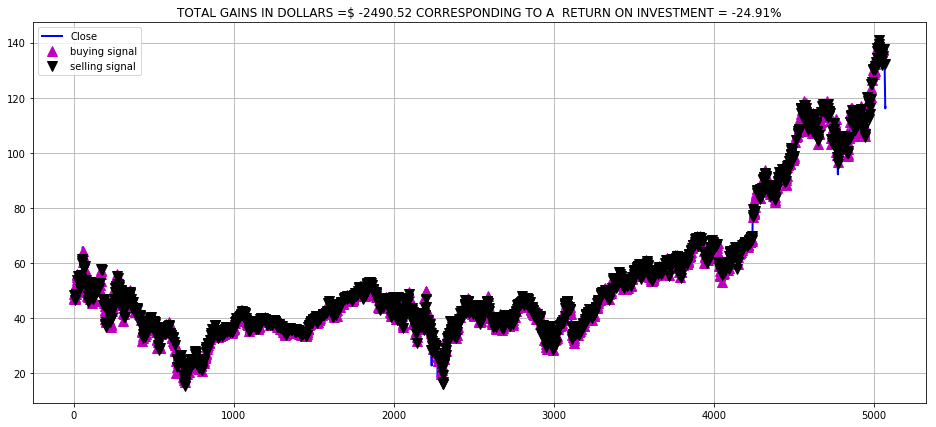

In [11]:
close = df['Close']
fig = plt.figure(figsize = (16,7))
plt.plot(close, color='b', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('TOTAL GAINS IN DOLLARS =$ %.2f CORRESPONDING TO A  RETURN ON INVESTMENT = %.2f%%'%(total_gains, invest))
plt.grid()
plt.legend()
plt.savefig('output/'+name+'.png')
plt.show()

## 7. CONCLUSIONS

Our seccond attempt to find a reasonable return appears timid, to say the least. It does not seem substantially superior to the non-intelligent models. The question stands on wether we could find in the toolbox of Machine Learning something that could effectivelly produce significant returns.  This is the task for the next sections.